In [4]:
from pathlib import Path
import csv
import pandas as pd

data_path = Path("jester-data-1.csv")
dataset = []

with open(data_path, newline="") as csvfile:
    csvreader = csv.reader(csvfile, delimiter=",")

    for row in csvreader:
        conv = [None] * (len(row) - 1)

        for i in range(1, len(row)):
            if row[i] != "99":
                conv[i - 1] = float(row[i]) / 10.0

        dataset.append(conv)


df = pd.DataFrame(dataset)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.782,0.879,-0.966,-0.816,-0.752,-0.850,-0.985,0.417,-0.898,-0.476,...,0.282,NaN,NaN,NaN,NaN,NaN,-0.563,NaN,NaN,NaN
1,0.408,-0.029,0.636,0.437,-0.238,-0.966,-0.073,-0.534,0.888,0.922,...,0.282,-0.495,-0.029,0.786,-0.019,-0.214,0.306,0.034,-0.432,0.107
2,NaN,NaN,NaN,NaN,0.903,0.927,0.903,0.927,NaN,NaN,...,NaN,NaN,NaN,0.908,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.835,NaN,NaN,0.180,0.816,-0.282,0.621,NaN,0.184,...,NaN,NaN,NaN,0.053,NaN,NaN,NaN,NaN,NaN,NaN
4,0.850,0.461,-0.417,-0.539,0.136,0.160,0.704,0.461,-0.044,0.573,...,0.519,0.558,0.427,0.519,0.573,0.155,0.311,0.655,0.180,0.160


In [35]:
# https://scikit-learn.org/stable/modules/impute.html

import numpy as np
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy="mean")
imp.fit(df.values)

X = imp.transform(df.values).T

print(X)

[[-0.782       0.408       0.09045733 ...  0.09045733  0.09045733
   0.243     ]
 [ 0.879      -0.029       0.02084596 ...  0.02084596  0.02084596
   0.267     ]
 [-0.966       0.636       0.03165743 ...  0.03165743  0.03165743
  -0.398     ]
 ...
 [ 0.07676917  0.034       0.07676917 ...  0.07676917  0.07676917
   0.07676917]
 [-0.00312438 -0.432      -0.00312438 ... -0.00312438 -0.00312438
  -0.00312438]
 [ 0.13547109  0.107       0.13547109 ...  0.13547109  0.13547109
   0.13547109]]


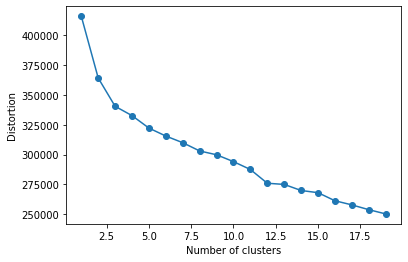

In [42]:
# https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c

# calculate distortion for a range of number of cluster
distortions = []

for i in range(1, 20):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )

    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [47]:
from sklearn.cluster import KMeans

# Using sklearn
km = KMeans(n_clusters=12)
km.fit(X)

# Get cluster assignment labels
labels = km.labels_
y_km = km.fit_predict(X)

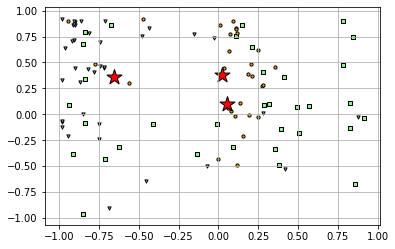

In [46]:
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=10, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=10, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=10, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

#plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [48]:
y_km

array([ 0,  0,  0,  2,  2,  1,  5,  3,  3,  0,  1,  8, 10,  8, 10,  4,  2,
        9, 11, 11,  8,  8,  3,  4,  8,  8,  1,  1,  1,  2,  1,  1,  3,  8,
        1,  1,  4,  1,  8,  8,  2,  8,  3,  4,  1,  8,  1,  1,  7,  1,  2,
        2,  1,  7,  3,  8,  4,  4,  2,  3,  1,  7,  2,  3,  8,  1,  3,  7,
        1,  2,  6,  6,  6,  2,  2,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  1,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6],
      dtype=int32)

In [49]:
len(y_km)

100

In [50]:
km.cluster_centers_

array([[-0.33625   ,  0.48425   ,  0.06827095, ...,  0.06827095,
         0.06827095,  0.14325   ],
       [ 0.12018274, -0.00278947,  0.7311301 , ..., -0.056718  ,
         0.16107154,  0.46723537],
       [-0.54278552,  0.3945    ,  0.03502291, ..., -0.08346331,
        -0.19430862,  0.14954781],
       ...,
       [-0.981     , -0.068     ,  0.903     , ...,  0.723     ,
        -0.413     ,  0.136     ],
       [-0.718     ,  0.449     ,  0.1505    , ..., -0.663     ,
        -0.301     , -0.8515    ],
       [-0.985     ,  0.1045    ,  0.903     , ..., -0.012     ,
        -0.762     , -0.114     ]])

In [51]:
len(km.cluster_centers_)

12